# Churn?

#### before we start with the problem itself there are some questions we need to answer:
1. What is the business question? 
-     Givin some information about the customer can you predict if he is going to churn?
2. What each row represent? 
-     Customer
3. What is the evaluation method? 
-     Accuracy 

# Answer these questions:
-       Please note that in is assignment specifically we will not split the data
1. How many columns in the dataset?
2. How many numerical columns in the dataset?
3. How many columns with "null" values in the dataset?
4. What is the column with the biggest number of categories in the data?
5. Show the distribution graph of "MonthlyCharges" using bin size 10, and state what is the most common values?
6. Who is most likely to churn in terms of "SeniorCitizen" column (which value)?
7. What is the most correlated to columns? (you can use function .corr())
8. Show the correlation graph between these two columns.
9. Are the label balanced?

In [52]:
import pandas as pd 
import numpy as py 
import matplotlib.pyplot as plt

In [12]:
df = pd.read_csv('dataset.csv')
df.head(500)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,NaN,Yes,No,NaN,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,NaN,No,No,34.0,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,NaN,No,No,2.0,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,NaN,No,No,45.0,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,NaN,No,No,2.0,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,8205-OTCHB,Male,0.0,No,No,22.0,No,No phone service,DSL,No,...,Yes,No,No,Yes,One year,Yes,Bank transfer (automatic),43.75,903.60,Yes
496,4134-BSXLX,Male,0.0,Yes,No,28.0,Yes,No,DSL,Yes,...,No,Yes,No,No,Month-to-month,No,Mailed check,60.90,1785.65,No
497,0505-SPOOW,Female,0.0,Yes,No,70.0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic),19.80,1397.65,No
498,6235-VDHOM,Female,1.0,No,No,5.0,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,No,Electronic check,28.45,131.05,Yes


How many columns in the dataset?


In [5]:
df.shape 

(7043, 21)

In [17]:
print ("number of columns is 21")

number of columns is 21


How many numerical columns in the dataset?


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7000 non-null   float64
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            6896 non-null   float64
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [13]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7000.000000,6896.000000,7043.000000,7043.000000
mean,0.163143,33.041473,64.761692,2283.300440
std,0.369522,24.382260,30.090047,2265.000258
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,10.000000,35.500000,402.225000
50%,0.000000,30.000000,70.350000,1400.550000
75%,0.000000,56.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [16]:
print("number of numerical columns in the dataset = 3 ")

number of numerical columns in the dataset = 3 


How many columns with "null" values in the dataset


In [32]:

df["SeniorCitizen"].value_counts()


0.0    5858
1.0    1142
Name: SeniorCitizen, dtype: int64

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7000 non-null   float64
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            6896 non-null   float64
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [42]:
print(' number of columns with "null" values = 2 ')

 number of columns with "null" values = 2 


What is the column with the biggest number of categories in the data? 


In [46]:
df["MultipleLines"].value_counts()

No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64

In [47]:
df["PaymentMethod"].value_counts()

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64

In [50]:
df["Contract"].value_counts()

Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64

In [51]:
 print(" the column with the biggest number of categories in the data is PaymentMethod ")

 the column with the biggest number of categories in the data is PaymentMethod 


Show the distribution graph of "MonthlyCharges" using bin size 10, and state what is the most common values?


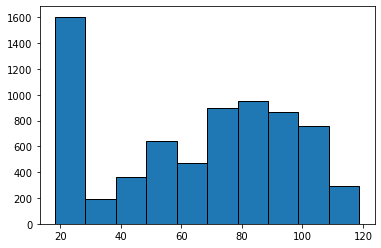

In [78]:
plt.xlabel=('MonthlyCharges')
plt.ylabel=('people')
plt.hist(df['MonthlyCharges'] ,bins= 10 , edgecolor='black' )


plt.show()

In [73]:
df['MonthlyCharges'].mode()[0]

20.05

In [76]:
print('the most common values = 20.05')

the most common values = 20.05


What is the most correlated to columns


In [75]:
df.corr()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
SeniorCitizen,1.000000,0.013521,0.221101,0.102831
tenure,0.013521,1.000000,0.238635,0.822171
MonthlyCharges,0.221101,0.238635,1.000000,0.650468
TotalCharges,0.102831,0.822171,0.650468,1.000000


In [77]:
print (' the most correlated = TotalCharges&tenure')

 the most correlated = TotalCharges&tenure


Show the correlation graph between these two columns

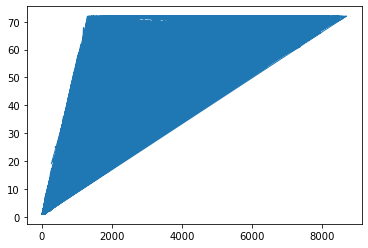

In [86]:
plt.plot(df['TotalCharges'],df['tenure']  ,linewidth=1)
 